In [8]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from model_settings import ms
from plotters import PlotCols

ms.find_root(Path())


pd.set_option('display.max_columns',None)

def HistCols(df,columns=None,sharex=True):
    if columns == None:
        columns = df.columns.tolist()
        sharex = False

    fig,axs=plt.subplots(len(columns),sharex=sharex,figsize=(10,20))
    for i,col in enumerate(columns):
        axs[i].hist(df[col],label=col.replace('_',' '),color='purple',bins=int(np.sqrt(df.shape[0])))
        axs[i].legend()

def test_model(df,pricename):
    df = df.copy()
    df['target_price'] = df[pricename]
    df['observed_price'] = df['relative_observed']*df['strike_price']
    df['pricing_error'] = df['observed_price']-df[pricename]
    df['relative_error'] = df['pricing_error']/df[pricename]
    df['squared_error'] = df['pricing_error']**2
    df['absolute_error'] = np.abs(df['pricing_error'])
    df['absolute_relative'] = np.abs(df['relative_error'])
    desc = df.describe()
    MAE = desc.loc['mean','absolute_error']
    RMSE = np.sqrt(desc.loc['mean','squared_error'])
    MARE = desc.loc['mean','absolute_relative']
    print(f"MAE:\n   {round(MAE,4)}\nRMSE:\n   {round(RMSE,4)}\nMARE:\n   {round(100*MARE,4)}%")
    return df.iloc[:,-7:]

In [9]:
models_dir = os.path.join(ms.root,ms.MacDirEx,Path(ms.trained_models).parent)

In [10]:
models = [f for f in os.listdir(models_dir) if f.endswith('.pkl')]
models

['2024-11-09 124248013907 retrained_relative_asian_options.pkl',
 '2024-11-09 223743847698 retrained_relative_barrier_options.pkl']

In [11]:
model = joblib.load(os.path.join(models_dir,models[0]))
model.keys()

dict_keys(['errors', 'models'])

In [12]:
errors = model['errors']
models = model['models']

['cpu', 'isMAE', 'isRMSE', 'osMAE', 'osRMSE']


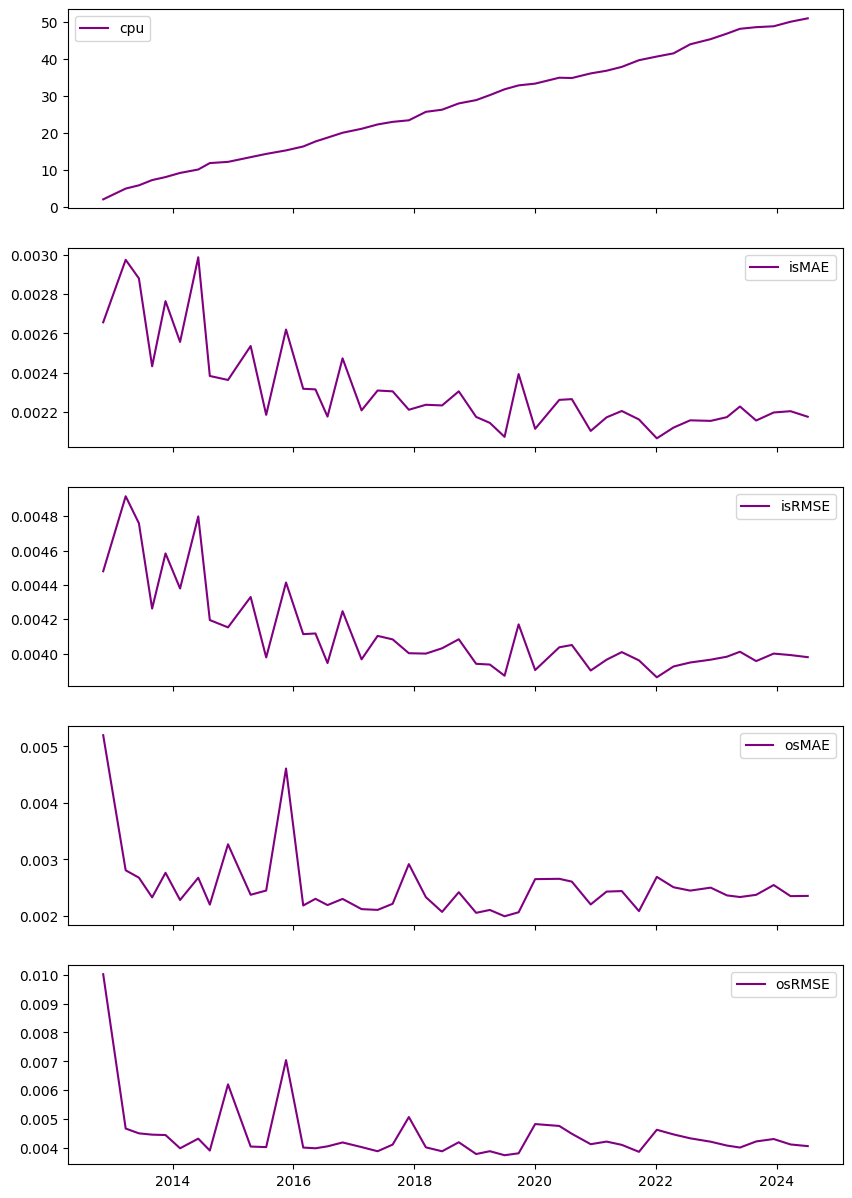

interpolation range is [5.01064, 5.16813] x [0, 1.98439]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.14893] x [0, 2.24089]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.13879] x [0, 1.50155]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.16813] x [0, 1.98439]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.14893] x [0, 2.24089]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.13879] x [0, 1.50155]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.16813] x [0, 1.98439]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.13879] x [0, 1.50155]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.13879] x [0, 1.50155]: extrapolation at (4.60517, 0.222812) not allowed
interpolation range is [5.01064, 5.16

In [26]:
PlotCols(errors)

In [14]:
dates = pd.Series([d for d in models.keys()])
dates.describe()[['min','max']]

min    2012-11-06 00:00:00
max    2024-07-08 00:00:00
dtype: object

In [15]:
model = models[dates.iloc[-1]]
data = model['test_data']
pricename = [n for n in data.columns if n.find('barrier_price')!=-1 or n.find('asian_price')!=-1][0]

In [27]:
model.keys()

dict_keys(['seed', 'raw_data', 'dataset', 'target_name', 'excluded_features', 'numerical_features', 'categorical_features', 'feature_set', 'n_features', 'development_dates', 'test_dates', 'train_data', 'test_data', 'train_X', 'train_y', 'test_X', 'test_y', 'preprocessor', 'pipeline', 'model', 'model_fit', 'dnn_runtime', 'numerical_scaler', 'dnn_params', 'transformers', 'regressor', 'dnn_pipeline'])

In [16]:
df = test_model(data,pricename)
df.columns

MAE:
   6.669
RMSE:
   13.6369
MARE:
   0.7879%


Index(['target_price', 'observed_price', 'pricing_error', 'relative_error',
       'squared_error', 'absolute_error', 'absolute_relative'],
      dtype='object')

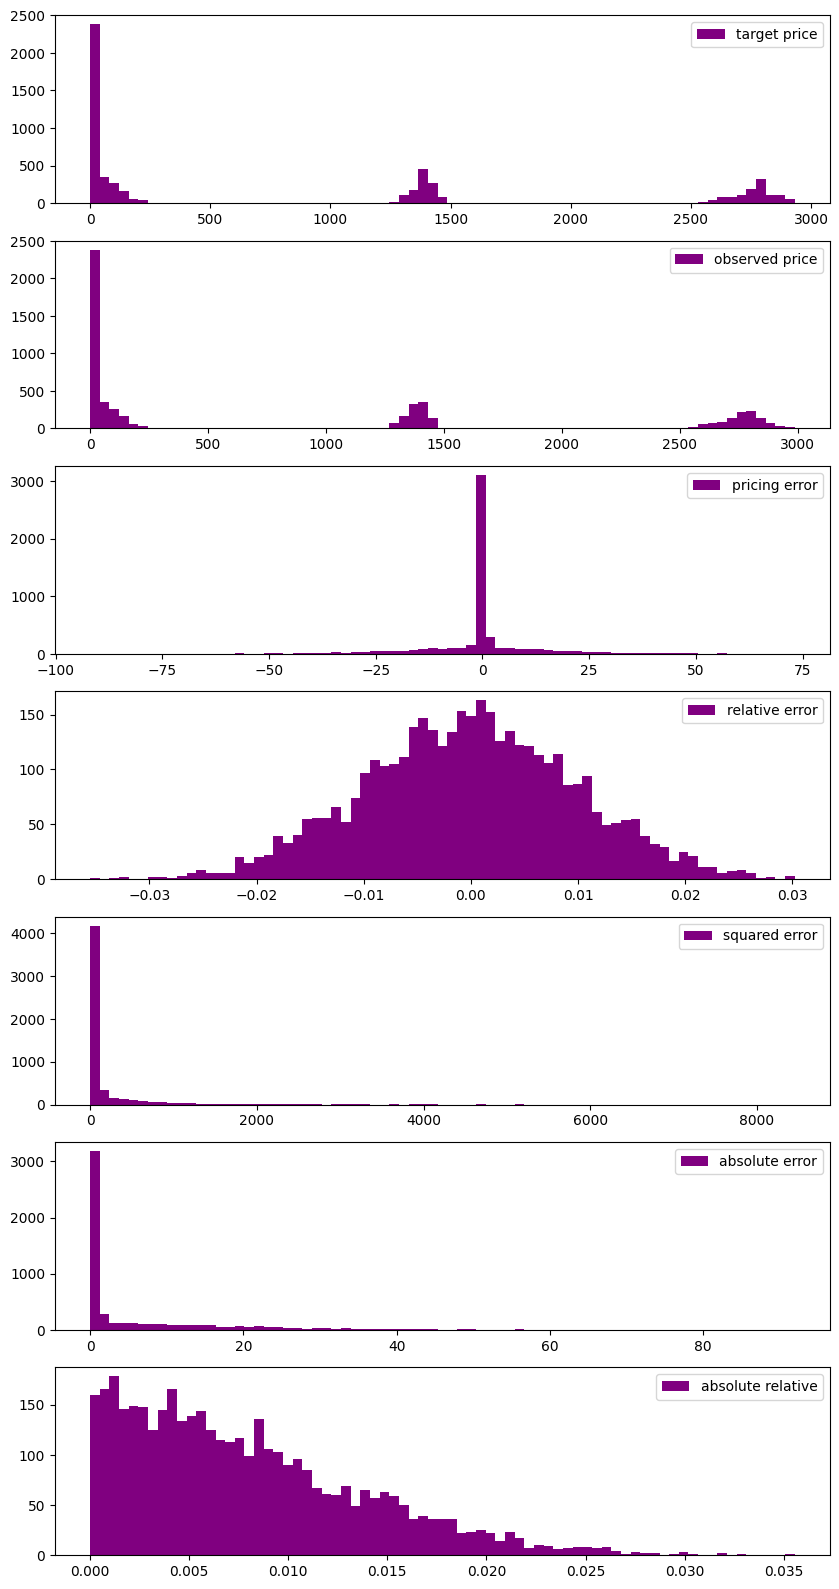

In [17]:
HistCols(df,sharex=False)

In [18]:
estimation = df['observed_price']
target = df['target_price']
relative = df['relative_error']

In [19]:
for k in model.keys():
    print(k)

seed
raw_data
dataset
target_name
excluded_features
numerical_features
categorical_features
feature_set
n_features
development_dates
test_dates
train_data
test_data
train_X
train_y
test_X
test_y
preprocessor
pipeline
model
model_fit
dnn_runtime
numerical_scaler
dnn_params
transformers
regressor
dnn_pipeline


In [20]:
trained = model['model']
trained

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('StandardScaler',
                                                                                       StandardScaler(),
                                                                                       ['days_to_maturity',
                                                                                        'fixing_frequency',
                                                                                        'past_fixings',
                                                                                        'risk_free_rate',
                                                                                        'dividend_rate',
                                                                                        'kappa',
                                                                                        'theta',
                                                                                        'rho',
                                                                                        'eta',
                                                                                        'v0',
                                                                                        'relative_spot']),
                                                                                      ('OneHotEncoder',
                                                                                       OneHotEncoder(sparse_output=False),
                                                                                       ['averaging_type',
                                                                                        'w'])])),
                                                     ('regressor',
                                                      MLPRegressor(alpha=0.01,
                                                                   hidden_layer_sizes=(13,
                                                                                       13),
                                                                   learning_rate='adaptive',
                                                                   learning_rate_init=0.1,
                                                                   max_iter=500,
                                                                   random_state=1312,
                                                                   solver='sgd',
                                                                   warm_start=True))]),
                           transformer=StandardScaler())

In [21]:
import quantlib_pricers as qlp

In [22]:
params = model['test_data'][['calculation_date','kappa','theta','eta','rho','v0']].copy().set_index('calculation_date').drop_duplicates(keep='last')
params

,kappa,theta,eta,rho,v0
calculation_date,,,,,
2024-07-10 16:04:35.395,6.023309,1.182037e-08,2.290920,-0.695539,0.222812
2024-07-10 15:56:42.793,12.406590,3.598049e-08,3.143177,-0.588743,0.120898
2024-07-11 15:41:32.379,15.391094,1.962803e-02,4.945284,-0.379123,0.076581
2024-07-11 14:56:44.483,0.795263,7.795442e-02,0.647310,-0.999995,0.013616
2024-07-12 15:38:37.803,8.771263,6.986394e-03,1.769657,-0.540000,0.063685
2024-07-17 15:28:35.243,13.169548,1.750488e-08,4.251715,-0.654992,0.163436
2024-07-18 16:06:10.590,21.214513,1.017234e-04,2.673040,-0.624950,0.147283
2024-07-18 13:25:51.402,7.013359,2.344029e-02,1.570973,-0.627182,0.045045
2024-07-24 16:27:20.890,1.725627,9.790669e-02,1.305904,-0.603676,0.000200


In [23]:
import pandas as pd
import numpy as np
from itertools import product

s = [100]
K = [80,100,120]
T = [30,60,90]

features_dict = {
    'spot_price':s,
    'strike_price':K,
    'days_to_maturity':T,
    'risk_free_rate':[0.04],
    'dividend_rate':[0.00],
    'w':['call','put'],
    'barrier_type_name':['DownOut'],
    'rebate':[0],
    'barrier':[50,100,150],
}

def CartesianProduct(features_dict):
    return pd.DataFrame(product(*features_dict.values()),columns=features_dict.keys())

In [24]:
params.iloc[0].values

array([ 6.02330919e+00,  1.18203657e-08,  2.29091964e+00, -6.95538778e-01,
        2.22812082e-01])

In [25]:
features = CartesianProduct(features_dict)
features[['kappa','theta','eta','rho','v0']] = np.tile(params.iloc[0].values,(features.shape[0],1))
features['vanilla'] = qlp.vanillas.df_heston_price(features)
features['barrier_price'] = qlp.barriers.df_barrier_price(features)
features

,spot_price,strike_price,days_to_maturity,risk_free_rate,dividend_rate,w,barrier_type_name,rebate,barrier,kappa,theta,eta,rho,v0,vanilla,barrier_price
0,100,80,30,0.04,0.0,call,DownOut,0,50,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,20.754614,20.755875
1,100,80,30,0.04,0.0,call,DownOut,0,100,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,20.754614,0.000000
2,100,80,30,0.04,0.0,call,DownOut,0,150,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,20.754614,NaN
3,100,80,30,0.04,0.0,put,DownOut,0,50,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,0.492032,0.444878
4,100,80,30,0.04,0.0,put,DownOut,0,100,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,0.492032,0.000000
5,100,80,30,0.04,0.0,put,DownOut,0,150,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,0.492032,NaN
6,100,80,60,0.04,0.0,call,DownOut,0,50,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,21.593089,21.592955
7,100,80,60,0.04,0.0,call,DownOut,0,100,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,21.593089,0.000000
8,100,80,60,0.04,0.0,call,DownOut,0,150,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,21.593089,NaN
9,100,80,60,0.04,0.0,put,DownOut,0,50,6.023309,1.182037e-08,2.29092,-0.695539,0.222812,1.068787,0.679406
